             SentimentText  SentimentPolarity
0               유통기한도 넉넉하고                  1
1       구성도 많아서 선물 하기 좋네요.                  1
2                   구성도알차고                  1
3                촉촉하고너무좋아용                  1
4      대용량으로 넉넉하게 사용할 수 있고                  1
...                    ...                ...
51509                  순하고                  1
51510     번들거리는 게 없어 좋습니다.                  1
51511          저렴하게 구매했네요.                  1
51512               발림도 좋고                  1
51513   피부가 쫀득쫀득해지는거 같습니다.                  1

[51514 rows x 2 columns]


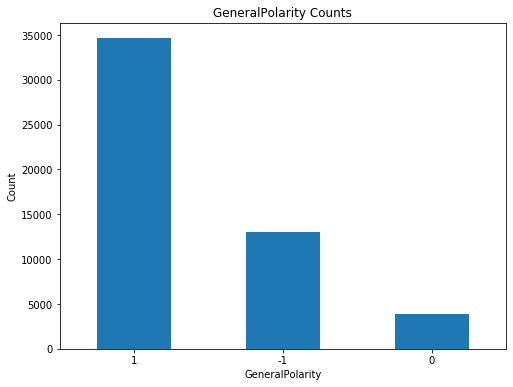

47684


C:\Users\Joy\sentiment_analytics.py:55: FutureWarning: The default value of regex will change from True to False in a future version.
  review_df['content'] = review_df['content'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


32410
              id                                               name  \
0  A000000192697  [2023어워즈/3년연속] 아누아 어성초 77 수딩 토너 350ml 어워즈 한정 기...   
1  A000000192697  [2023어워즈/3년연속] 아누아 어성초 77 수딩 토너 350ml 어워즈 한정 기...   
2  A000000192697  [2023어워즈/3년연속] 아누아 어성초 77 수딩 토너 350ml 어워즈 한정 기...   
3  A000000192697  [2023어워즈/3년연속] 아누아 어성초 77 수딩 토너 350ml 어워즈 한정 기...   
4  A000000192697  [2023어워즈/3년연속] 아누아 어성초 77 수딩 토너 350ml 어워즈 한정 기...   

         date                                            content  
0  2023.11.30  피부타입  복합성요 토너 없이는 못살아요겨울 강철 추위도 버티게 해주는 저의 최애템...  
1  2023.11.28  다른 토너로 갈아탔다가 환절기 때 피부가 뒤집어지고 너무 안 돌아와서 다시 구매합니...  
2  2023.11.26  전 이거 하나로 흡토 닦토 다 하고 있어요 자극없이 순하고 용량도 많아서 밤마다 화...  
3  2023.11.19      자극없이 순하고 결 정돈하기 좋은 토너예요민감성 지성 복합성 다 두루 쓰기 좋아요  
4  2023.11.11  이제는 제 화장대에 없는게 말이 안되는 재구매템정말이지 공병만 몇 십병 만들었을거에...  
전처리 후 학습 데이터 수 : 47684
훈련 데이터 수: 38147
테스트 데이터 수: 9537


C:\Users\Joy\sentiment_analytics.py:67: FutureWarning: The default value of regex will change from True to False in a future version.
  df['SentimentText'] = df['SentimentText'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
C:\Users\Joy\sentiment_analytics.py:68: FutureWarning: The default value of regex will change from True to False in a future version.
  df['SentimentText'] = df['SentimentText'].str.replace('^ +', "") # 공백은 empty 값으로 변경
C:\Users\Joy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


예측 정확도: 0.9294, ROC-AUC: 0.9694


C:\Users\Joy\sentiment_analytics.py:128: FutureWarning: The default value of regex will change from True to False in a future version.
  review_df['content'] = review_df['content'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
C:\Users\Joy\sentiment_analytics.py:131: FutureWarning: The default value of regex will change from True to False in a future version.
  df['SentimentText'] = df['SentimentText'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
C:\Users\Joy\sentiment_analytics.py:132: FutureWarning: The default value of regex will change from True to False in a future version.
  df['SentimentText'] = df['SentimentText'].str.replace('^ +', "") # 공백은 empty 값으로 변경
C:\Users\Joy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to 

예측 정확도: 0.9294, ROC-AUC: 0.9694


In [2]:
import kss
from sentiment_analytics import *

review = pd.read_csv('review.csv', encoding='UTF-8')
ai_hub = pd.read_csv('ai_hub_data.csv', encoding='UTF-8')

In [12]:
soothing = set(['진정', '자극', '트러블', '여드름', '순하다', '효과', '좁쌀', '예민', '제거', '나다', '민감',
                     '민감성', '피지', '올라오다', '어성초', '붉다', '티트리', '가라', '앉다' ])

moisturizing = set(['보습', '건조', '건성', '수분', '흡수', '촉촉하다', '타입', '겨울', '지성', '여름',
                         '수분감', '속건조', '복합성' '채우다' '촉촉' '수부지', ])
skin = set(['각질', '모공', '피부결', '크다', '부드럽다', '정돈', '화장솜', '장벽', '탄력', '보호'])


dict = {'soothing': False, 'moisturizing': False, 'skin': False}

#column 추가- soothing_pos,neg / moisturizing_pos,neg / skin_pos,neg

review_df = pd.read_csv('df_new_review.csv')

for topic in dict:
    review_df["{}_pos".format(topic)] = [0 for i in range(len(review_df))]
    review_df["{}_neg".format(topic)] = [0 for i in range(len(review_df))]

for topic in dict:
    for i in range(len(review_df)):
            # 디버깅
            if i % 500 == 0:
                print(i)
            context = kss.split_sentences(review_df.iloc[i]['content'])
            dict = {'soothing': False, 'moisturizing': False, 'skin': False}
            for keyword in eval(topic):
                for text in context:
                    if keyword in text and not dict[topic]:
                        dict[topic] = True
                        if predict_sentiment(text) == 1:
                            review_df.loc[i, "{}_pos".format(topic)] = 1
                        else:
                            review_df.loc[i, "{}_neg".format(topic)] = 1

0
0
0


In [22]:
from sklearn.metrics import accuracy_score
for topic in dict:
    print("{} accuracy:".format(topic), accuracy_score(review_df["{}_pos".format(topic)], review_df["label_{}".format(topic)]))


soothing accuracy: 0.5
moisturizing accuracy: 0.75
skin accuracy: 0.9


In [14]:
review_df["label_soothing"] = [0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1]
review_df["label_moisturizing"] = [0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
review_df["label_skin"] = [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

In [7]:
for i in review_df.content:
    print(i)
    print()


피부에 여드름 심하게 나지 않는데요주신 화장솜에 잔뜩 제품 묻혀서얹어놨더니 ㅠㅠ 얼굴 전체 울긋불긋 올라왓어요간지럽고후기 보니 올라왓다는 사람들이 많네요전 그렇게 민감한 피부가 아닌데ㅠㅠ속상해요

으흠 써보니 또 그렇게 효과가 드라마틱하지않네요절반썼는데 그 이후엔 손이 잘 안가요

동봉된 화장솜을 사용하여 토너팩을 하고 싶다면 아누아 토너패드를 구매하는 것을 추천드립니다 화장솜이 생각보다 거칠어서 자극이 느껴지기 때문에 축축하게 적셔서 사용하다 보면 짜잔 있었는데 없었습니다금방 다 써버려요장점 좁쌀 직빵오돌토돌한 좁쌀 여드름에 정말 좋아요 울긋불긋한 화농성 여드름에도 좁쌀 여드름만큼은 아니지만 꽤 괜찮아요 여드름성 피부에게 강추합니다 산뜻한 사용감완전 물처럼 어성초 특이취도 거의 안 느껴지고 닦토로 한 번 닦아주면 산뜻해요 자극을 최소한으로 살살 닦아주면 좋아요단점 토너팩 사용앞서 언급한 것처럼 토너팩으로 사용하고 싶다면 토너 패드를 구매하는 걸 추천해요 토너를 사용하면 가성비가 너무 떨어져요 보습개인적으로 촉촉하다고 느껴지진 않았어요 그래서 닦토를 흡수시키자마자 바로 로션을 발라줬습니다

솔직히 처음에는 순해서 마음에 들었다가 어느순간 피지가 차는 느낌이 나더라구요 그리고 이게 물제형과 무향이라서 그냥 토너라고 생각했는데 은근 유분이 느껴지는 건 저 뿐인가요 건성 분들에게는 추천하는데 오히려 지성피지가 차는 좁쌀 여드름이 있으신 분들에게는 오히려 유분과 피지가 생길 수도 있을 것 같아요 저는 매일 토너로 쓰기 보다는 바하 토너 쓰다가 피부가 좀 정상적으로 돌아왔을 때나 메이크업 전 각질 제거로 화장솜에 묻혀 닦을 때만 사용하고 있습니다 저처럼 좁쌀 피지가 많으신 분들에게는 추천하지 않습니다 제품 자체는 순합니다

진짜 이거는 신이 제게 내리신거 같아요 맨날 써야할거 같은 ㅎㅎ 그리고 이걸 거의 맨날 세일 할때마다 사거든요 일단 피부가 뒤집힐때마다 많이 효과를 본 제품이거든요 진짜 마스크팩 쓸때도 이거 토너는 맨날 마스크팩에 적셔놀정도로 넘 좋아요 어느계절 사

In [5]:
review_df.to_csv('test1.csv',index=False)

In [6]:
review = pd.read_csv('test1.csv', encoding='UTF-8')


In [1]:
review = pd.read_csv('test1.csv', encoding='UTF-8')
review = review[review['moisturizing_pos'] == 1.0]
pos = review.groupby(['name']).count()
print(pos.columns)
pos
pos['name'] = pos.index.to_list()
pos['moisturizing_pos'] = round(pos['moisturizing_pos'])

print(sum(pos['moisturizing_pos']/pos['moisturizing_pos'].count()))
pos[['name', 'moisturizing_pos']]


NameError: name 'pd' is not defined

In [33]:
import numpy as np
review = pd.read_csv('test1.csv', encoding='UTF-8')
review = review[review['moisturizing_neg'] == 1.0]
neg = review.groupby(['name']).count()
print(neg.columns)
neg
neg['name'] = neg.index.to_list()
neg['moisturizing_neg'] = round(neg['moisturizing_neg']*1.5)
neg
mean_neg = np.mean(neg['moisturizing_neg'])
print(mean_neg)
std_neg = np.std(neg['moisturizing_neg'])
print(std_neg)
neg[['name', 'moisturizing_neg']]


Index(['id', 'date', 'content', 'moisturizing_pos', 'moisturizing_neg'], dtype='object')
21.40972222222222
9.69708804690904


,name,moisturizing_neg
name,,
[1+1 기획] 차앤박(CNP) 아쿠아 수딩 토너 1+1 기획,[1+1 기획] 차앤박(CNP) 아쿠아 수딩 토너 1+1 기획,20.0
[1+1 모공케어] 유세린 더머토클린 클래리파잉 토너 더블기획 (200ml+200ml),[1+1 모공케어] 유세린 더머토클린 클래리파잉 토너 더블기획 (200ml+200ml),4.0
[1+1][구름토너] 마몽드 블루 아줄렌 클라우드 토너 150ml 기획 (+150ml 리필 추가 증정),[1+1][구름토너] 마몽드 블루 아줄렌 클라우드 토너 150ml 기획 (+150m...,32.0
[1+1기획] 구달 맑은 어성초 진정 수분 토너 300ml 기획(+300ml 리필),[1+1기획] 구달 맑은 어성초 진정 수분 토너 300ml 기획(+300ml 리필),20.0
[2023어워즈/3년연속] 아누아 어성초 77 수딩 토너 350ml 어워즈 한정 기획 (본품+리필팩+진정마스크1매),[2023어워즈/3년연속] 아누아 어성초 77 수딩 토너 350ml 어워즈 한정 기...,14.0
...,...,...
피지오겔 레드수딩 시카밸런스 토너 200ml,피지오겔 레드수딩 시카밸런스 토너 200ml,22.0
피캄 베리어 사이클 락토P 토너 200ml,피캄 베리어 사이클 락토P 토너 200ml,16.0
피캄 베리어 사이클 락토P 토너200ml 기획(+화장솜 증정),피캄 베리어 사이클 락토P 토너200ml 기획(+화장솜 증정),10.0


ValueError: x and y must have same first dimension, but have shapes (144,) and (1,)

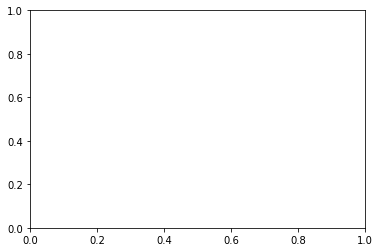

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# plt.legend(f'N({mean_neg},{std_neg})')
rv = norm(mean_neg, std_neg)
y = rv.pdf(neg['moisturizing_neg'])
plt.plot(neg['moisturizing_neg'], y)
plt.show()